In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [2]:
from gw_eccentricity.gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figWidthsTwoColDict, figHeightsDict

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [9]:
import glob
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
averaging_methods = ["mean_of_extrema_interpolants", "interpolate_orbit_averages_at_extrema", "omega22_zeroecc"]

In [5]:
eob_waveforms = sorted(glob.glob("../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_*_Momega00.010_meanAno1.571.h5"))[135:150:2]

In [7]:
zeroecc_waveform = "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002_meanAno1.571.h5"

0it [00:00, ?it/s]/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
2it [00:08,  4.27s/it]/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")
/home1/md.shaikh/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:647: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non m

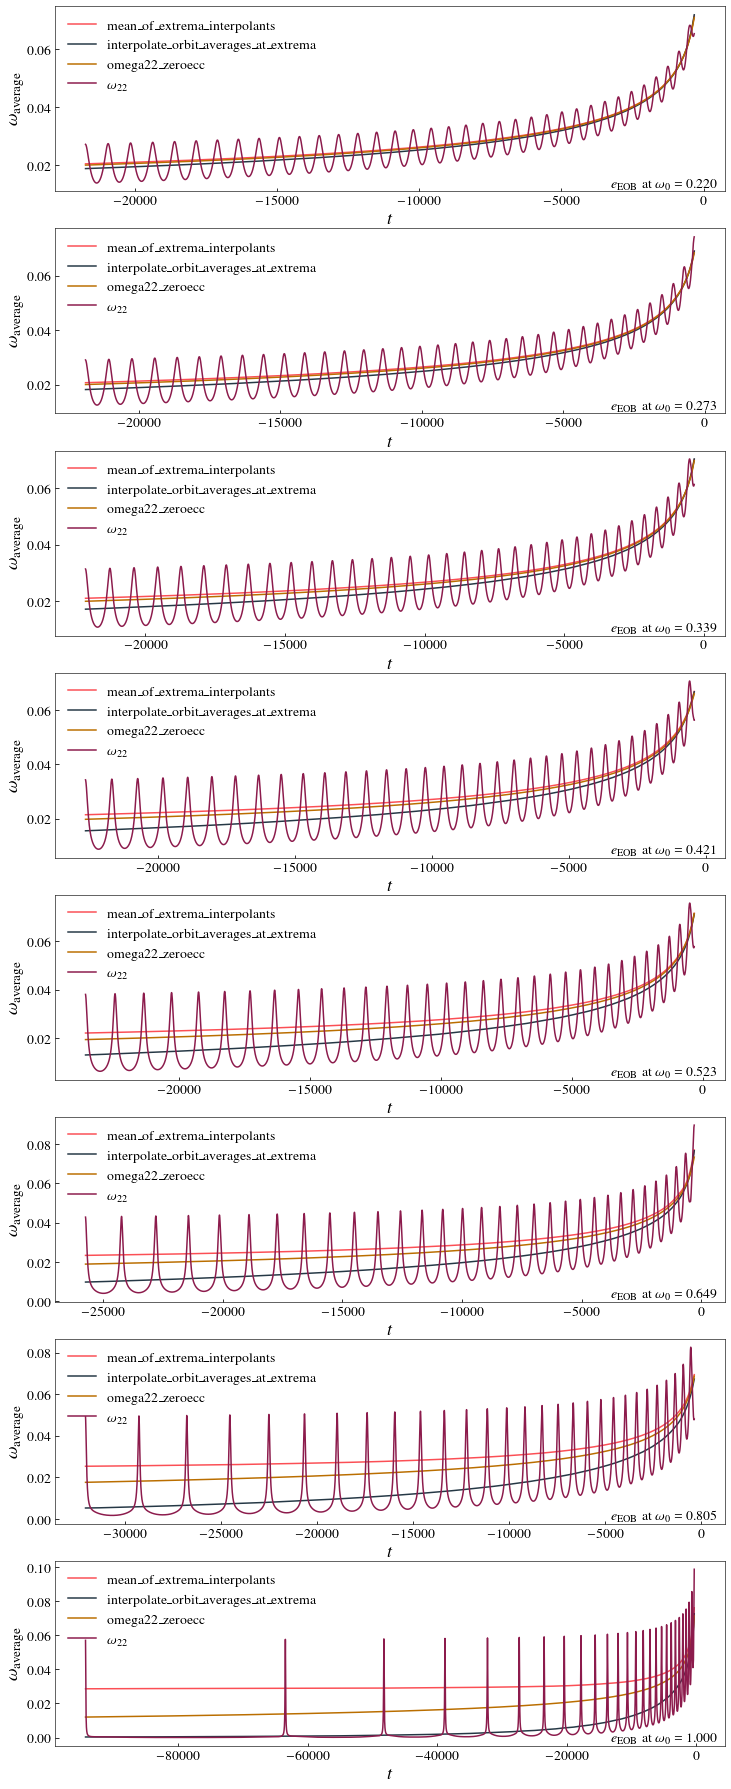

In [10]:
nrows = len(eob_waveforms)
style = "Notebook"
method = "ResidualAmplitude"
use_fancy_plotsettings(style=style)
fig, axes = plt.subplots(nrows=nrows, figsize=(figWidthsTwoColDict[style], nrows * figHeightsDict[style]))
for idx, waveform in tqdm(enumerate(eob_waveforms)):
    ecc = float(re.search("\d.\d{10}", waveform)[0])
    # laod data
    kwargs = {"filepath": waveform,
             "filepath_zero_ecc": zeroecc_waveform,
             "include_zero_ecc": True}
    dataDict = load_waveform("EOB", **kwargs)
    fref_in = 0.01
    for omega_avg_method in averaging_methods:
        fref_out, ecc_ref, mean_ano_ref, gwecc_obj = measure_eccentricity(
            fref_in=fref_in, dataDict=dataDict, method=method, return_gwecc_object=True,
            extra_kwargs={"omega22_averaging_method": omega_avg_method})
        axes[idx].plot(gwecc_obj.t_for_omega22_average, gwecc_obj.omega22_average, label=omega_avg_method)
    start = np.argmin(np.abs(gwecc_obj.t - gwecc_obj.t_for_omega22_average[0]))
    end = np.argmin(np.abs(gwecc_obj.t - gwecc_obj.t_for_omega22_average[-1]))
    axes[idx].plot(gwecc_obj.t[start: end], gwecc_obj.omega22[start: end], label=r"$\omega_{22}$")
    axes[idx].legend()
    axes[idx].set_xlabel(r"$t$")
    axes[idx].set_ylabel(r"$\omega_\mathrm{average}$")
    axes[idx].text(0.99, 0.01, f"$e_\mathrm{{EOB}}$ at $\omega_0$ = {ecc:.3f}", va="bottom", ha="right", transform=axes[idx].transAxes)

In [11]:
fig.tight_layout()
fig.savefig("compare_omega_averaging_methods.png")